In [ ]:
from utils_notebook_init import init_notebook
init_notebook()

✅ Notebook initialized. Project root: /Users/yihan/Developers/baby-cry-analysis


'/Users/yihan/Developers/baby-cry-analysis'

Import and read label CSV

In [2]:
import pandas as pd

# Load the manifest file we generated earlier
df = pd.read_csv("data/labels_from_filenames.csv")
df.head()

,filename,label_short,label,duration_sec
0,data/raw/baby_cry_sence_dataset/belly_pain/549...,bp,belly pain,6.86
1,data/raw/baby_cry_sence_dataset/belly_pain/643...,bp,belly pain,7.00
2,data/raw/baby_cry_sence_dataset/belly_pain/643...,bp,belly pain,7.00
3,data/raw/baby_cry_sence_dataset/belly_pain/643...,bp,belly pain,7.00
4,data/raw/baby_cry_sence_dataset/belly_pain/643...,bp,belly pain,7.00


Pick a few sample files

In [3]:
# Take 3 random examples from different classes
sample_df = df.sample(3, random_state=42)
sample_df

,filename,label_short,label,duration_sec
304,data/raw/baby_cry_sence_dataset/hungry/999bf14...,hu,hungry,6.9
495,data/raw/baby_cry_sence_dataset/tired/B2AABCE0...,ti,tired,7.0
439,data/raw/baby_cry_sence_dataset/hungry/eccb461...,hu,hungry,6.9


Apply preprocessing

In [ ]:
from preprocessing import load_and_standardize

processed = []
for path in sample_df["filename"]:
    y, sr = load_and_standardize(path)
    processed.append((y, sr))
    print(f"{path} -> sr={sr}, len={len(y)} samples ({len(y)/sr:.2f}s)")

data/raw/baby_cry_sence_dataset/hungry/999bf14b-e417-4b44-b746-9253f81efe38-1431013068243-1.7-m-26-hu.wav -> sr=16000, len=128000 samples (8.00s)
data/raw/baby_cry_sence_dataset/tired/B2AABCE0-1F62-4B57-B58A-308959ABDFE7-1437188766-1.1-m-26-ti.wav -> sr=16000, len=128000 samples (8.00s)
data/raw/baby_cry_sence_dataset/hungry/eccb4617-8373-4c4f-b49e-bb2d72bce8d8-1430035348191-1.7-m-26-hu.wav -> sr=16000, len=128000 samples (8.00s)


Visualize waveforms

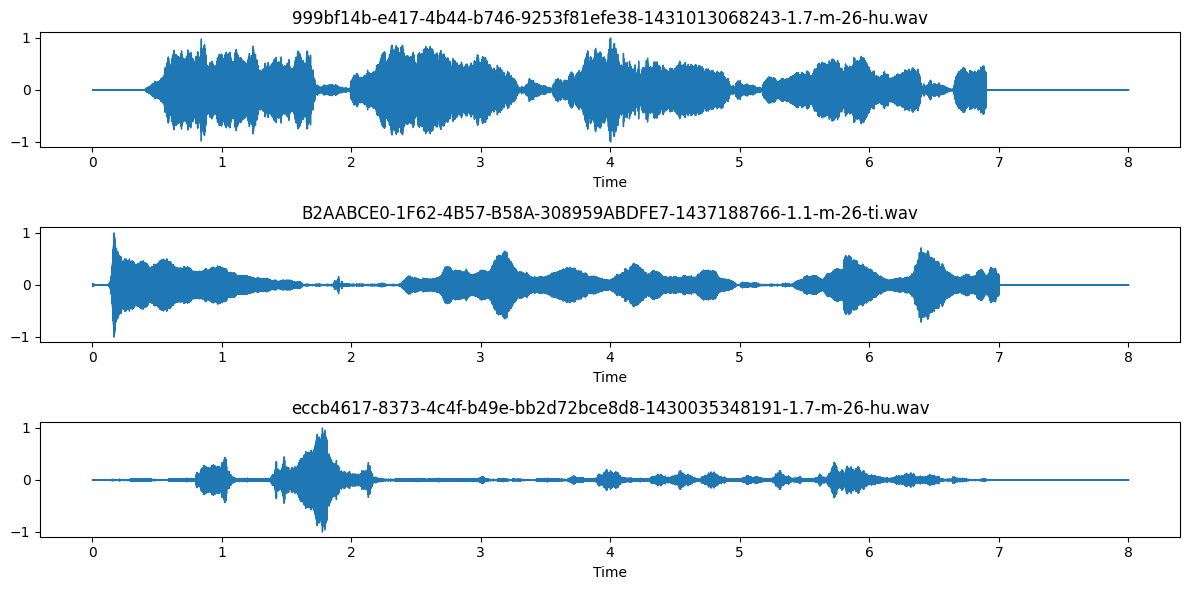

In [6]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(12, 6))
for i, (path, (y, sr)) in enumerate(zip(sample_df["filename"], processed), 1):
    plt.subplot(len(processed), 1, i)
    librosa.display.waveshow(y, sr=sr)
    plt.title(path.split("/")[-1])
plt.tight_layout()
plt.show()

In [4]:
import soundfile as sf
info = sf.info("/Users/yihan/Developers/baby-cry-analysis/data/raw/baby_cry_sence_dataset/lonely/0f257dac-7d6f-4575-9192-e3b4dcd3d4ef-1430185393784-1.7-f-26-lo.wav")
print(info)

/Users/yihan/Developers/baby-cry-analysis/data/raw/baby_cry_sence_dataset/lonely/0f257dac-7d6f-4575-9192-e3b4dcd3d4ef-1430185393784-1.7-f-26-lo.wav
samplerate: 44100 Hz
channels: 2
duration: 6.960 s
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
